In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

2025-06-14 17:49:29.883213: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749923370.224919      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749923370.320022      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

train_df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_df = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

y_train_full = train_df['label']
X_train_full = train_df.drop(columns=['label'])

X_train_full = X_train_full / 255.0
X_test = test_df / 255.0  

X_train_full = X_train_full.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

y_train_full_one_hot = to_categorical(y_train_full, num_classes=10)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full_one_hot,
    test_size=0.1,  # 10% for validation
    random_state=42, # For reproducible results
    stratify=y_train_full
)

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")

X_train shape: (37800, 28, 28, 1)
X_val shape: (4200, 28, 28, 1)
y_train shape: (37800, 10)
y_val shape: (4200, 10)


In [3]:
inputs = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

2025-06-14 17:50:00.626846: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=128,
    validation_data=(X_val, y_val), 
    verbose=2
)

Epoch 1/15
296/296 - 22s - 73ms/step - accuracy: 0.8770 - loss: 0.3911 - val_accuracy: 0.9731 - val_loss: 0.0905
Epoch 2/15
296/296 - 19s - 64ms/step - accuracy: 0.9630 - loss: 0.1217 - val_accuracy: 0.9812 - val_loss: 0.0625
Epoch 3/15
296/296 - 18s - 62ms/step - accuracy: 0.9732 - loss: 0.0875 - val_accuracy: 0.9860 - val_loss: 0.0456
Epoch 4/15
296/296 - 17s - 56ms/step - accuracy: 0.9780 - loss: 0.0713 - val_accuracy: 0.9869 - val_loss: 0.0441
Epoch 5/15
296/296 - 17s - 58ms/step - accuracy: 0.9805 - loss: 0.0624 - val_accuracy: 0.9898 - val_loss: 0.0366
Epoch 6/15
296/296 - 16s - 54ms/step - accuracy: 0.9834 - loss: 0.0538 - val_accuracy: 0.9886 - val_loss: 0.0385
Epoch 7/15
296/296 - 17s - 56ms/step - accuracy: 0.9853 - loss: 0.0480 - val_accuracy: 0.9895 - val_loss: 0.0390
Epoch 8/15
296/296 - 17s - 56ms/step - accuracy: 0.9857 - loss: 0.0435 - val_accuracy: 0.9905 - val_loss: 0.0345
Epoch 9/15
296/296 - 17s - 57ms/step - accuracy: 0.9869 - loss: 0.0413 - val_accuracy: 0.9881 - 

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


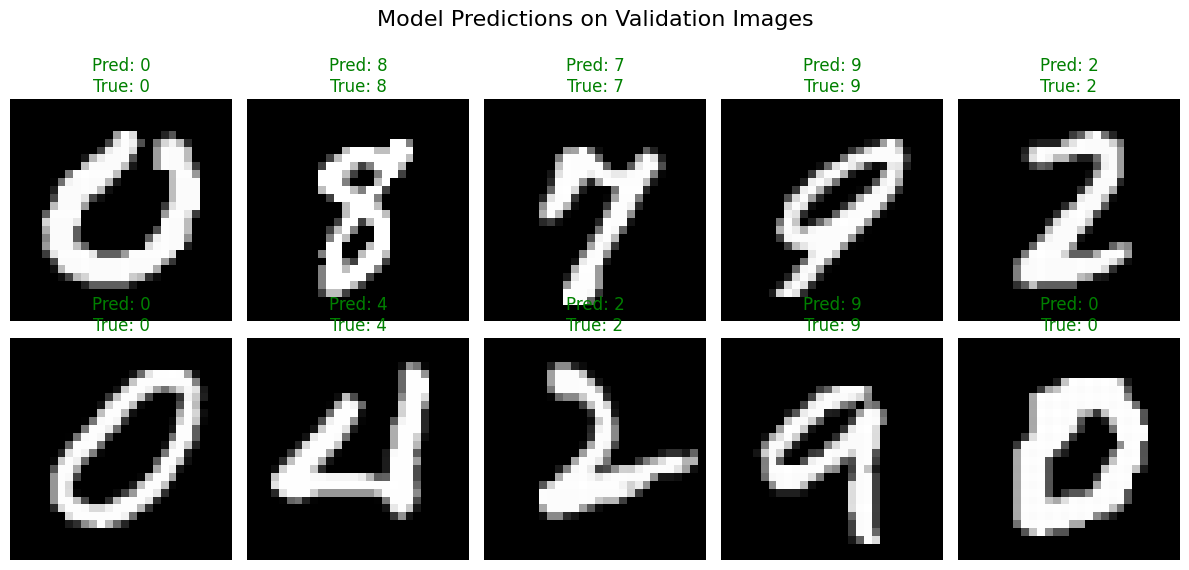

In [5]:
import numpy as np
import matplotlib.pyplot as plt

predictions = model.predict(X_val)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_val, axis=1)

plt.figure(figsize=(12, 6))
plt.suptitle("Model Predictions on Validation Images", fontsize=16)
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_val[i].reshape(28, 28), cmap='gray')
    
    # Set the title color to green for correct predictions and red for incorrect ones
    color = "green" if predicted_classes[i] == true_classes[i] else "red"
    plt.title(f"Pred: {predicted_classes[i]}\nTrue: {true_classes[i]}", color=color)
    
    plt.axis('off')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for the suptitle
plt.show()
